In [103]:

from spider_execution_plans.execution_plans.ep_reader import get_train_dev_spider_instances

In [104]:
l1, l2 = get_train_dev_spider_instances()

In [105]:
from collections import defaultdict
tables_per_schema = defaultdict(lambda: set())
fields_per_tables = defaultdict(lambda: set())
queries_per_schema = defaultdict(lambda: set())
questions_per_query = defaultdict(lambda: set())
questions_per_schema  = defaultdict(lambda: set())
table_per_query = defaultdict(lambda: [])
fields_per_query = defaultdict(lambda: [])
joins_per_query = defaultdict(lambda: [])

words_per_question = []

L = l1 + l2
for i in range(len(L)):
    questions_per_query[L[i].query].add(L[i].question)
    words_per_question.append(len(L[i].question.split()))
    try:
        defined_values = L[i].ep.relop.operation.defined_values
    except:    
        defined_values = L[i].ep.relop.operation.relop.operation.defined_values
    for dv in defined_values:
        column_references = dv.column_references
        for cr in column_references:
            if cr.schema is None:
                continue
            tables_per_schema[cr.schema].add(cr.table)
            fields_per_tables[cr.table].add(cr.column)
            queries_per_schema[cr.schema].add(L[i].question)
            questions_per_schema[cr.schema].add(L[i].query)
            table_per_query[L[i].query].append(cr.table)
            fields_per_query[L[i].query].append(cr.column)
            joins_per_query[L[i].query].append(L[i].query.upper().count('JOIN'))
# queries_per_schema


Text(0.5, 1.0, 'Tables Per Schema')

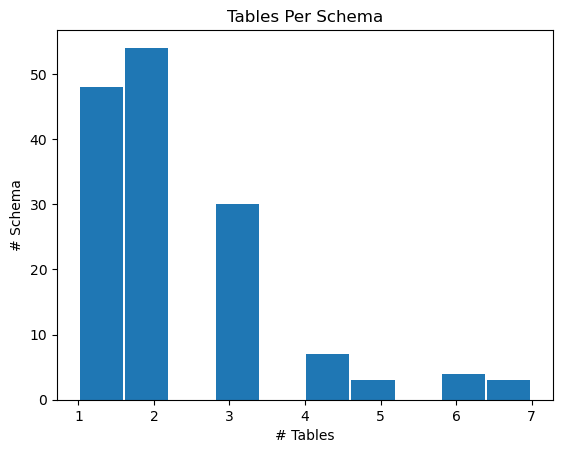

In [106]:
# tables_per_schema graph
import matplotlib.pyplot as plt
table_schema_list_count = []
for key in tables_per_schema.keys():    
    table_schema_list_count.append(len(tables_per_schema[key]))
plt.hist(table_schema_list_count, rwidth=0.95)
plt.xlabel("# Tables")
plt.ylabel("# Schema")
plt.title('Tables Per Schema')

Text(0.5, 1.0, 'Fields Per Tables')

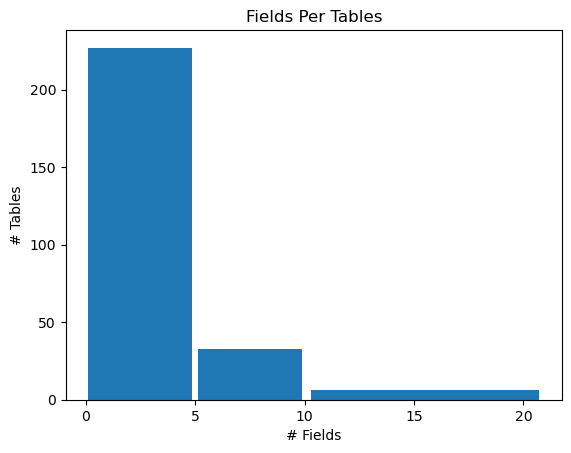

In [107]:
# fields_per_tables graph
import matplotlib.pyplot as plt
field_table_list_count = []
for key in fields_per_tables.keys():    
    field_table_list_count.append(len(fields_per_tables[key]))
plt.hist(field_table_list_count, bins=[0, 5, 10, max(field_table_list_count)], rwidth=0.95)
plt.xlabel("# Fields")
plt.ylabel("# Tables")
plt.title('Fields Per Tables')

Text(0.5, 1.0, 'Queries Per Schema')

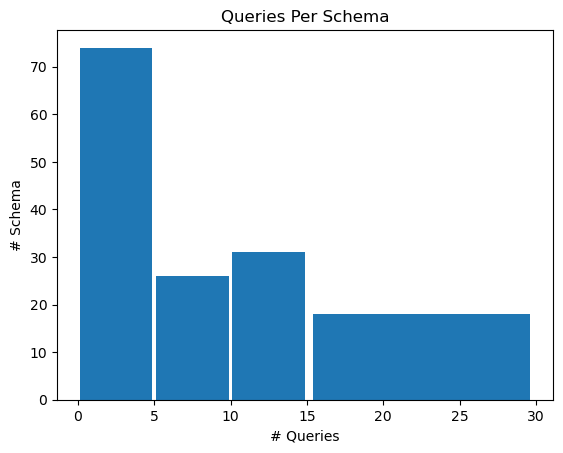

In [108]:
# queries_per_schema graph
import matplotlib.pyplot as plt
schema_queries_list_count = []
for key in queries_per_schema.keys():    
    schema_queries_list_count.append(len(queries_per_schema[key]))
plt.hist(schema_queries_list_count, bins=[0, 5, 10, 15, max(schema_queries_list_count)], rwidth=0.95)
plt.xlabel("# Queries")
plt.ylabel("# Schema")
plt.title('Queries Per Schema')

Text(0.5, 1.0, 'Questions Per Query')

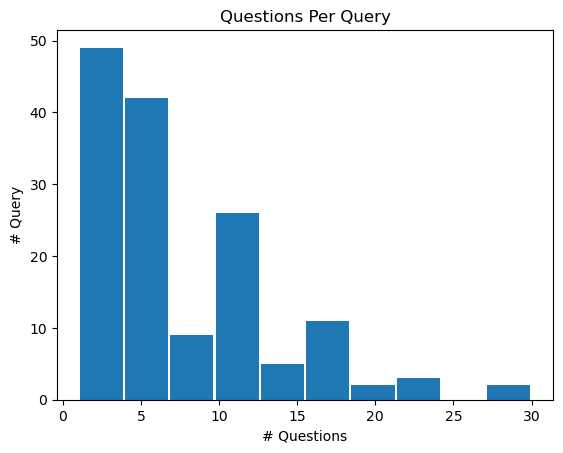

In [109]:
# questions_per_query
import matplotlib.pyplot as plt
querie_question_list_count = []
for key in questions_per_query.keys():    
    querie_question_list_count.append(len(questions_per_query[key]))
plt.hist(schema_queries_list_count, rwidth=0.95)
plt.xlabel("# Questions")
plt.ylabel("# Query")
plt.title('Questions Per Query')

Text(0.5, 1.0, 'Questions Per Schema')

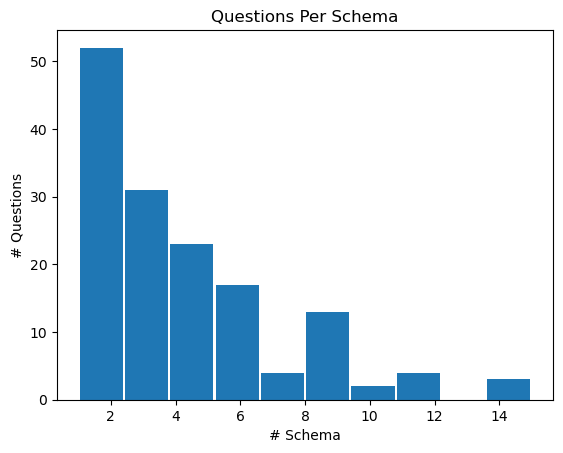

In [110]:
# questions_per_schema
import matplotlib.pyplot as plt
questions_per_schema_list = []
for key in questions_per_schema.keys():    
    questions_per_schema_list.append(len(questions_per_schema[key]))
plt.hist(questions_per_schema_list, rwidth=0.95)
plt.xlabel("# Schema")
plt.ylabel("# Questions")
plt.title('Questions Per Schema')

Text(0.5, 1.0, 'Words Per Question')

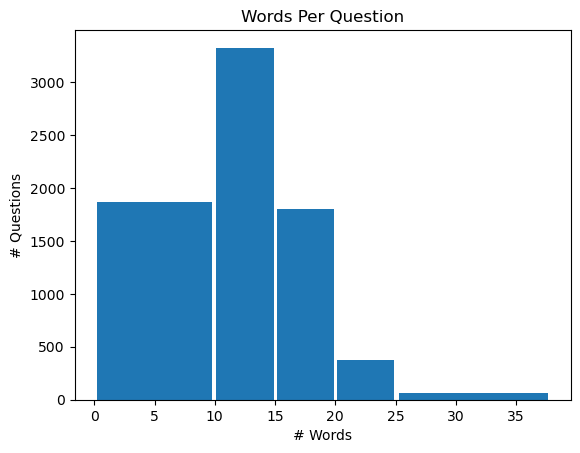

In [111]:
# words_per_question
import matplotlib.pyplot as plt
plt.hist(words_per_question, rwidth=0.95, log=False, bins=[0, 10, 15,20,25, max(words_per_question)])
plt.xlabel("# Words")
plt.ylabel("# Questions")
plt.title('Words Per Question')

Text(0.5, 1.0, 'Table Per Query')

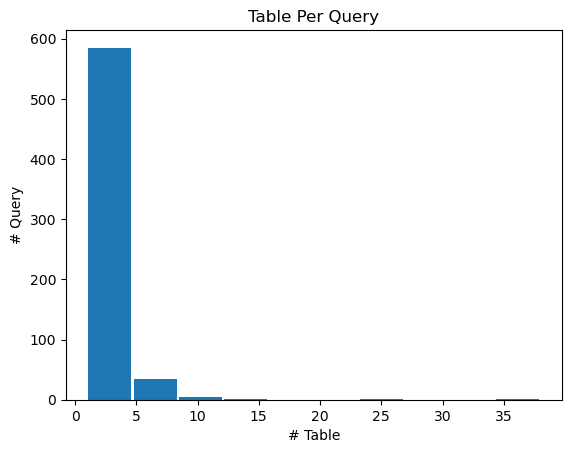

In [112]:
# table_per_query
import matplotlib.pyplot as plt

table_per_query_list_count = []
for key in table_per_query.keys():    
    table_per_query_list_count.append(len(table_per_query[key]))
plt.hist(table_per_query_list_count, rwidth=0.95)#, bins=[0, 5, 10, max(table_per_query_list_count)], rwidth=0.95)
plt.xlabel("# Table")
plt.ylabel("# Query")
plt.title('Table Per Query')

Text(0.5, 1.0, 'Fields Per Query')

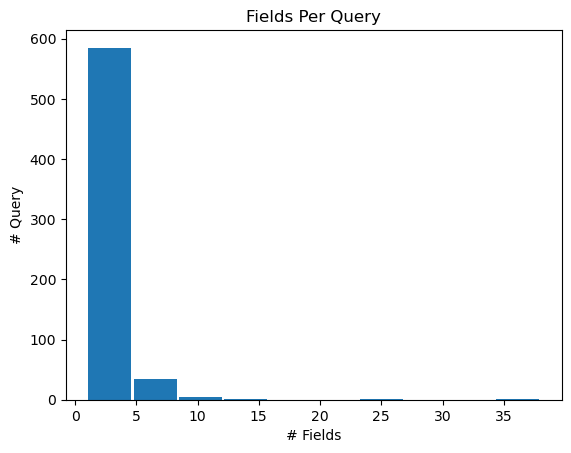

In [113]:
# fields_per_query
import matplotlib.pyplot as plt
fields_per_query_list_count = []
for key in fields_per_query.keys():    
    fields_per_query_list_count.append(len(fields_per_query[key]))
plt.hist(fields_per_query_list_count, rwidth=0.95)#, bins=[0, 5, 10, max(table_per_query_list_count)], rwidth=0.95)
plt.xlabel("# Fields")
plt.ylabel("# Query")
plt.title('Fields Per Query')




Text(0.5, 1.0, 'Fields Per Query')

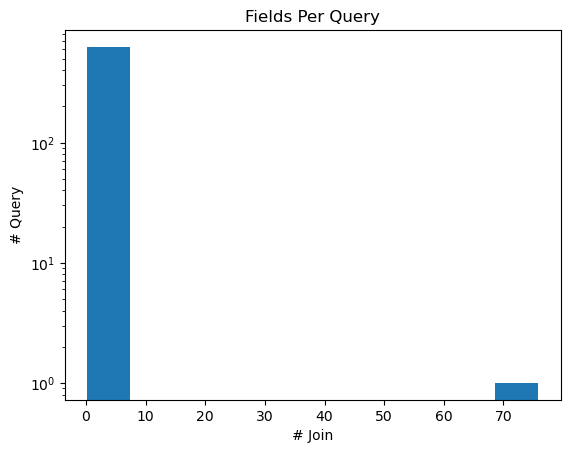

In [114]:
# joins_per_query
import matplotlib.pyplot as plt
joins_per_query_list_count = []
for key in joins_per_query.keys():    
    joins_per_query_list_count.append(sum(joins_per_query[key]))
plt.hist(joins_per_query_list_count, rwidth=0.95, log=True)
plt.xlabel("# Join")
plt.ylabel("# Query")
plt.title('Fields Per Query')
